<a href="https://colab.research.google.com/github/abdullahemam252/abdullahemam252/blob/main/Sign_Language_Classification_using_CNN_(Acc_94_)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')
grassknoted_asl_alphabet_path = kagglehub.dataset_download('grassknoted/asl-alphabet')

print('Data source import complete.')


100%|██████████| 62.6M/62.6M [00:01<00:00, 53.1MB/s]

Extracting files...


100%|██████████| 1.03G/1.03G [00:08<00:00, 128MB/s]

Extracting files...


Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
import pandas as pd

# Download the dataset and retrieve the path
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

# Construct the correct paths using the downloaded path
train_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_train.csv"
test_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_test.csv"

# Load the data using the correct paths
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [ ]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [ ]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

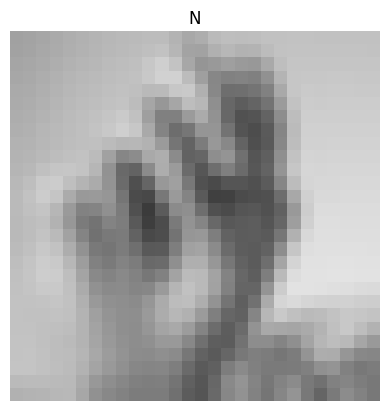

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to preprocess image with OpenCV
def preprocess_image(image):
    """
    Preprocess the image using OpenCV: Gaussian Blur, ROI extraction, normalization.
    """
    # Convert the image to grayscale (if not already)
    image = image.reshape(28, 28).astype('uint8')  # Reshape to original 28x28
    gray_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

    # Normalize the image
    normalized_image = blurred_image / 255.0

    # Optionally: Detect ROI (Region of Interest) if needed
    # For simplicity, this example does not apply ROI detection since 28x28 is already a cropped input.

    return normalized_image

# Randomly select an image for label verification
i = random.randint(0, len(train_set) - 1)  # Ensure index is within range

# Extract the raw image and preprocess
raw_image = train_set[i, 1:]  # Ignore the label column (first column)
processed_image = preprocess_image(raw_image)

# Display the processed image
plt.imshow(processed_image, cmap='gray')
label_index = train["label"][i]  # Fetch the corresponding label
plt.title(f"{class_names[label_index]}")
plt.axis('off')
plt.show()


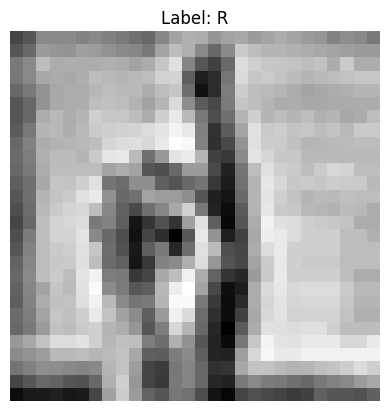

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to preprocess image with advanced techniques
def preprocess_image(image):
    """
    Preprocess the image using OpenCV:
    1. Reshape
    2. Denoising
    3. Contrast enhancement
    4. Normalization
    5. Optional: Region of Interest (ROI) detection
    """
    # Reshape to 28x28 and convert to uint8 format
    image = image.reshape(28, 28).astype('uint8')  # Ensure proper shape and format

    # Step 1: Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Step 2: Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(blurred)

    # Step 3: Normalize the image to range [0, 1] for model input compatibility
    normalized = contrast_enhanced / 255.0

    # Optional: Detect Region of Interest (ROI) if working with uncropped images
    # For example, detect the bounding box of the hand and crop the image
    # This step is skipped for already cropped 28x28 images.

    return normalized

# Randomly select and preprocess an image
i = random.randint(0, len(train_set) - 1)  # Ensure index is within range

# Extract the raw image (ignore the label column)
raw_image = train_set[i, 1:]

# Preprocess the selected image
processed_image = preprocess_image(raw_image)

# Visualize the processed image
plt.imshow(processed_image, cmap='gray')
label_index = train["label"][i]  # Fetch the corresponding label
plt.title(f"Label: {class_names[label_index]}")
plt.axis('off')
plt.show()


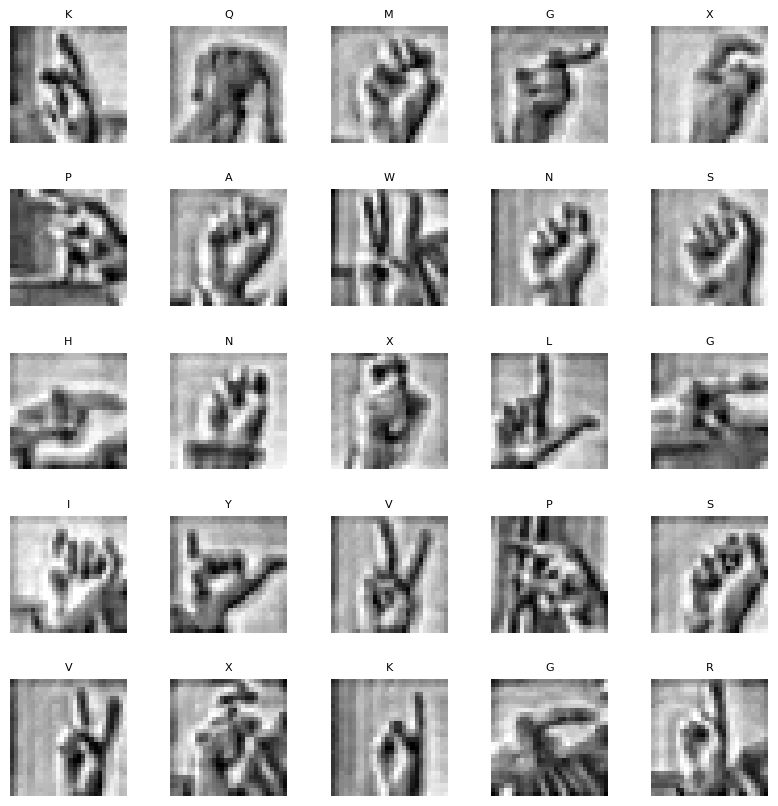

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

# Download the dataset and retrieve the path (if not already downloaded)
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

# Construct the correct paths using the downloaded path
train_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_train.csv"

# Load the training data using the correct path
train = pd.read_csv(train_file_path)

# Create training array
train_set = np.array(train, dtype='float32')

# Function to preprocess images
def preprocess_image(image):
    """
    Preprocess the image:
    - Reshape
    - Denoising with Gaussian Blur
    - Contrast enhancement using CLAHE
    - Normalization
    """
    # Reshape to 28x28
    image = image.reshape(28, 28).astype('uint8')

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(blurred)

    # Normalize to range [0, 1]
    normalized = contrast_enhanced / 255.0

    # Flatten the image (suitable for further processing)
    flattened = normalized.flatten()

    return flattened

#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize=(10, 10))
axes = axes.ravel()  # Flatten the 5x5 grid into a single array
n_train = len(train_set)  # Get the length of the training dataset

# Display processed and flattened images
for i in np.arange(0, W_grid * L_grid):  # Loop for the grid size
    # Select a random index
    index = np.random.randint(0, n_train)

    # Extract the image and preprocess it
    raw_image = train_set[index, 1:]  # Skip the label column
    processed_flattened_image = preprocess_image(raw_image)

    # Reshape flattened image back to 28x28 for visualization
    reshaped_image = processed_flattened_image.reshape(28, 28)

    # Display the image
    axes[i].imshow(reshaped_image, cmap='gray')
    label_index = int(train_set[index, 0])  # Get the label from the first column
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
import cv2
import numpy as np
import pandas as pd
import kagglehub

# Download the dataset if not already downloaded
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

# Construct paths for training and testing data
train_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_train.csv"
test_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_test.csv"

# Load the training and testing data
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path) # Load the test data here

# Create training and testing arrays
train_set = np.array(train, dtype='float32')
test_set = np.array(test, dtype='float32') # Create the test_set array

# Function to preprocess and flatten images
def preprocess_and_flatten(data):
    """
    Preprocess images and flatten them:
    - Reshape to 28x28
    - Apply Gaussian Blur to reduce noise
    - Enhance contrast using CLAHE
    - Normalize pixel values to [0, 1]
    - Flatten to 1D array (784 features)
    """
    processed_data = []
    for image in data:
        # Reshape image to 28x28
        image_reshaped = image.reshape(28, 28).astype('uint8')

        # Apply Gaussian Blur to reduce noise
        blurred = cv2.GaussianBlur(image_reshaped, (3, 3), 0)

        # Enhance contrast using CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced = clahe.apply(blurred)

        # Normalize pixel values to [0, 1]
        normalized = contrast_enhanced / 255.0

        # Flatten the image to a 1D array
        flattened = normalized.flatten()

        # Append the processed flattened image to the list
        processed_data.append(flattened)

    return np.array(processed_data)

# Separate labels and image data from the training and testing dataset
y_train = train_set[:, 0]
y_test = test_set[:, 0]

# Preprocess and flatten the training and testing datasets
X_train = preprocess_and_flatten(train_set[:, 1:])
X_test = preprocess_and_flatten(test_set[:, 1:])

# Output the shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (27455, 784)
y_train shape: (27455,)
X_test shape: (7172, 784)
y_test shape: (7172,)


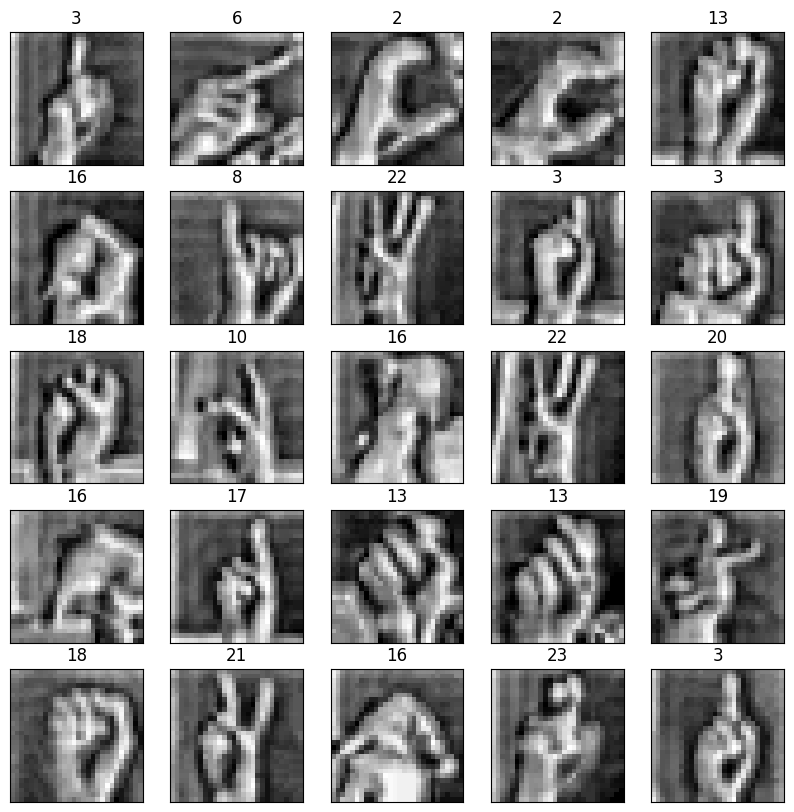

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Download the dataset if not already downloaded
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

# Construct paths for training and testing data
train_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_train.csv"
test_file_path = datamunge_sign_language_mnist_path + "/sign_mnist_test.csv"

# Load the training and testing data
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

# Convert the training and testing datasets to numpy arrays
train_set = np.array(train, dtype='float32')
test_set = np.array(test, dtype='float32')

# Function to preprocess and flatten images
def preprocess_and_flatten(data):
    """
    Preprocess images and flatten them:
    - Reshape to 28x28
    - Apply Gaussian Blur to reduce noise
    - Enhance contrast using CLAHE
    - Normalize pixel values to [0, 1]
    - Flatten to 1D array (784 features)
    """
    processed_data = []
    for image in data:
        # Reshape image to 28x28
        image_reshaped = image.reshape(28, 28).astype('uint8')

        # Apply Gaussian Blur to reduce noise
        blurred = cv2.GaussianBlur(image_reshaped, (3, 3), 0)

        # Enhance contrast using CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced = clahe.apply(blurred)

        # Normalize pixel values to [0, 1]
        normalized = contrast_enhanced / 255.0

        # Flatten the image to a 1D array
        flattened = normalized.flatten()

        # Append the processed flattened image to the list
        processed_data.append(flattened)

    return np.array(processed_data)

# Separate labels and image data from the training and testing dataset
y_train = train_set[:, 0]
y_test = test_set[:, 0]

# Preprocess and flatten the training and testing datasets
X_train = preprocess_and_flatten(train_set[:, 1:])
X_test = preprocess_and_flatten(test_set[:, 1:])

# Visualize training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    reshaped_image = X_train[i].reshape(28, 28) * 255  # Reshape and scale back to [0, 255] for visualization
    plt.imshow(reshaped_image.astype('uint8'), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(label_index)  # Replace `class_names` with the label index
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12345, stratify=y_train)

print(X_train.shape)
print(y_train.shape)


(21964, 784)
(21964,)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_validate = X_validate.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)


(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(25, activation='softmax'))

cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │          12,825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,545 (670.10 KB)

 Trainable params: 171,545 (670.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with sparse categorical crossentropy and a custom optimizer
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.2112 - loss: 2.5706 - val_accuracy: 0.8425 - val_loss: 0.4321
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8009 - loss: 0.5516 - val_accuracy: 0.9783 - val_loss: 0.1052
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9064 - loss: 0.2709 - val_accuracy: 0.9967 - val_loss: 0.0339
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9434 - loss: 0.1702 - val_accuracy: 0.9985 - val_loss: 0.0152
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9569 - loss: 0.1253 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9666 - loss: 0.1037 - val_accuracy: 0.9991 - val_loss: 0.0049
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9704 - loss: 0.0830 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9777 - loss: 0.0689 - 

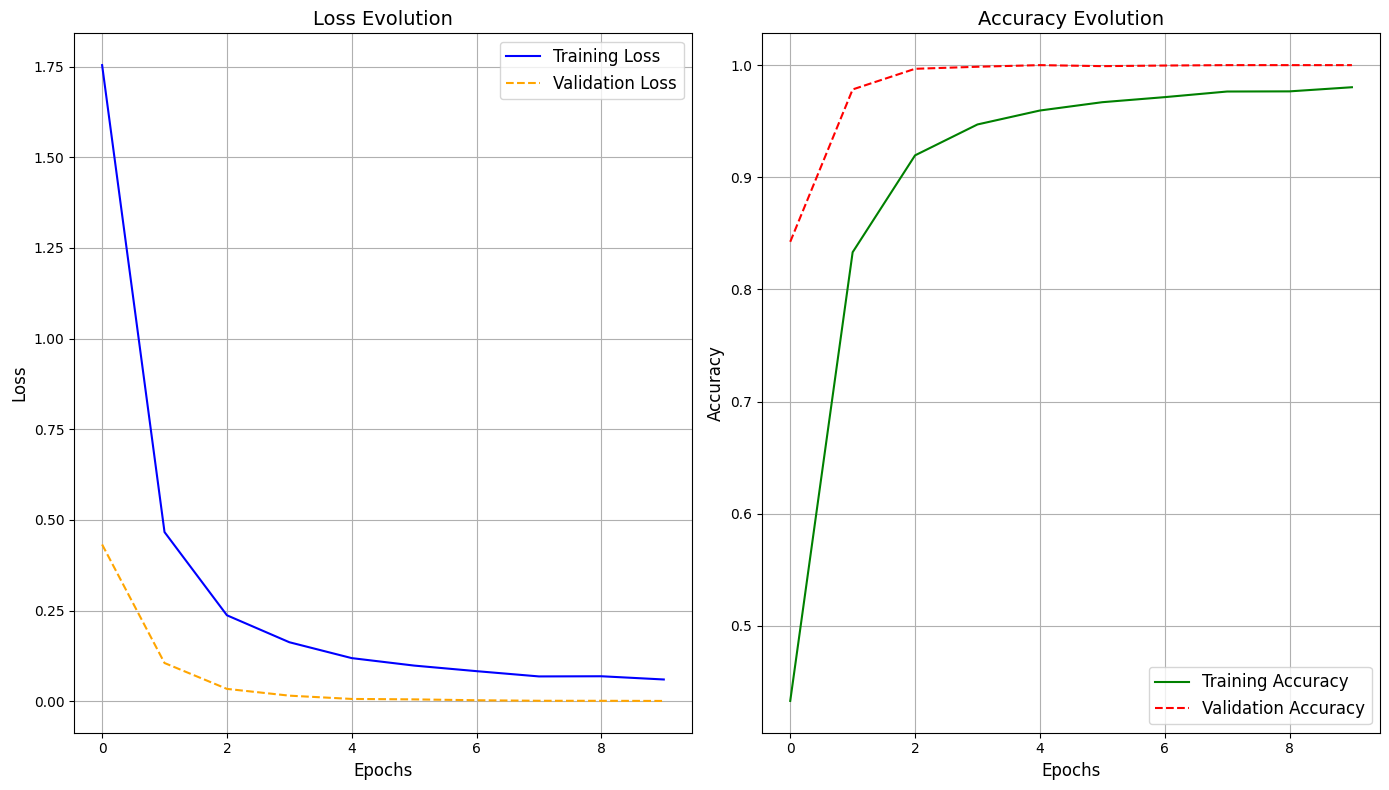

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# ... (Your existing code for model definition, data preprocessing, etc.) ...

# Assuming you have defined 'cnn_model', 'X_train', 'y_train', 'X_validate', 'y_validate'

# Fit the model and store the training history
history = cnn_model.fit(
    X_train,
    y_train,
    epochs=10,  # Choose an appropriate number of epochs
    batch_size=32,  # Choose an appropriate batch size
    validation_data=(X_validate, y_validate)
)

# Visualizing the training performance
plt.figure(figsize=(14, 8))

# Loss evolution
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='orange')
plt.title('Loss Evolution', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Accuracy evolution
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='red')
plt.title('Accuracy Evolution', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Importing numpy for numerical operations
import numpy as np

# Predicting classes for the test dataset
predicted_classes = np.argmax(cnn_model.predict(X_test, batch_size=32, verbose=1), axis=-1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


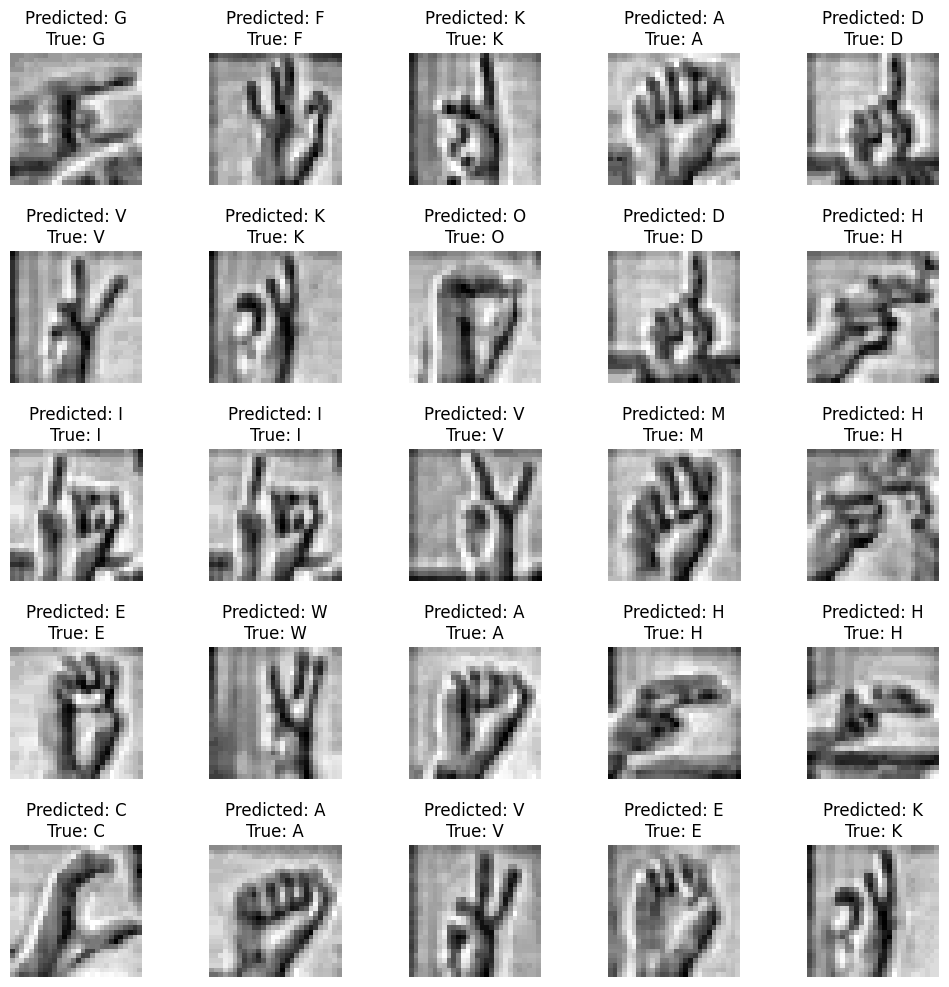

In [ ]:
# Visualizing predictions alongside true labels
L, W = 5, 5  # Grid dimensions
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()  # Flatten the axes array

for i in range(L * W):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\nTrue: {class_names[int(y_test[i])]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


Confusion matrix, without normalization


<Figure size 2000x2000 with 0 Axes>

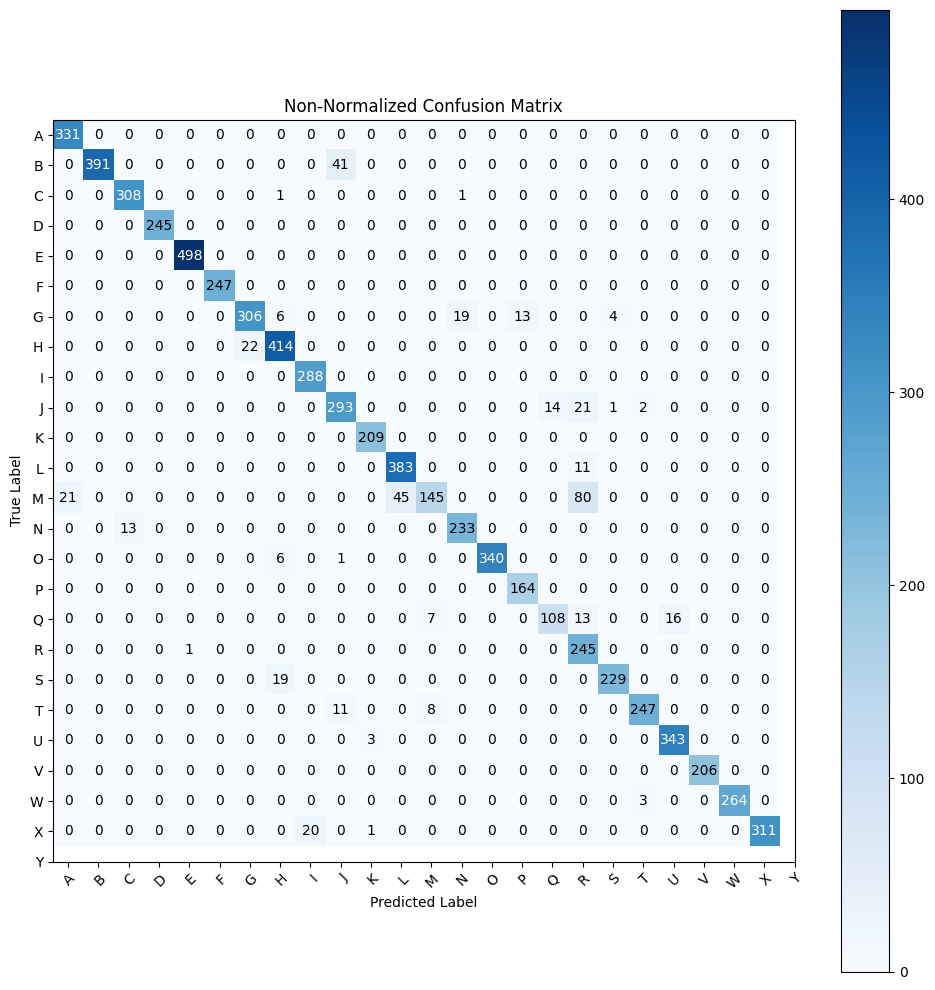

In [ ]:
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized Confusion Matrix' if normalize else 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Visualize confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Ensure the number of ticks matches the number of classes
    ax.set(
        xticks=np.arange(len(classes)),  # Correct tick alignment
        yticks=np.arange(len(classes)),  # Correct tick alignment
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True Label',
        xlabel='Predicted Label'
    )

    # Rotate tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Annotate cells with values
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Call the function to plot the confusion matrix
plt.figure(figsize=(20, 20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, title='Non-Normalized Confusion Matrix')


Normalized confusion matrix


<Figure size 3500x3500 with 0 Axes>

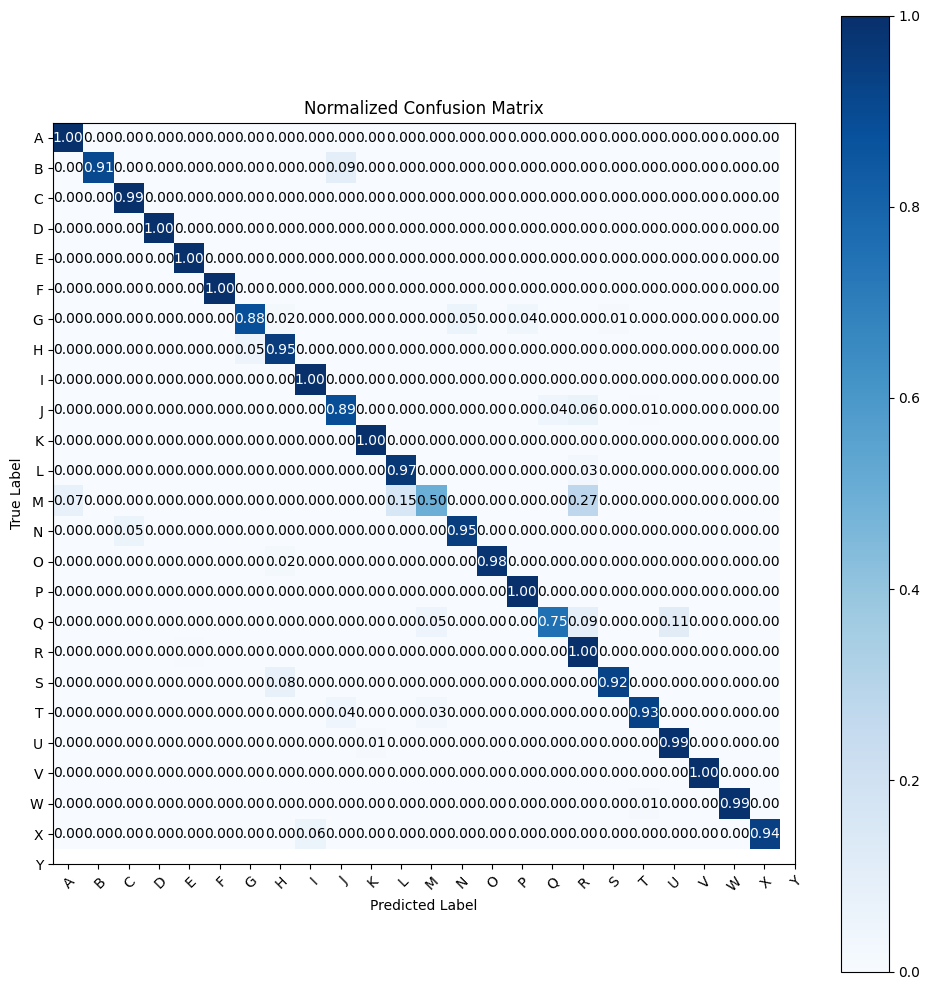

In [ ]:
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized Confusion Matrix' if normalize else 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Visualize confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Ensure the number of ticks matches the number of classes
    num_classes = len(classes)
    ax.set(
        xticks=np.arange(num_classes),
        yticks=np.arange(num_classes),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True Label',
        xlabel='Predicted Label'
    )

    # Rotate tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Annotate cells with values
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Call the function to plot the normalized confusion matrix
plt.figure(figsize=(35, 35))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, normalize=True, title='Normalized Confusion Matrix')


In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9408812046848857
